## After using spectral power

--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 380 features each.

Class Imbalance Ratio (0:1): 2.28 : 1
Data split into 74655 training samples and 18664 test samples.

--- Training XGBoost Classifier on Multi-Band Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Training Complete ---

--- Evaluating Model Performance on Test Set ---

Classification Report:
                 precision    recall  f1-score   support

Non-Seizure (0)       0.95      0.95      0.95     12970
    Seizure (1)       0.88      0.90      0.89      5694

       accuracy                           0.93     18664
      macro avg       0.92      0.92      0.92     18664
   weighted avg       0.93      0.93      0.93     18664

ROC AUC Score: 0.9796

Confusion Matrix:


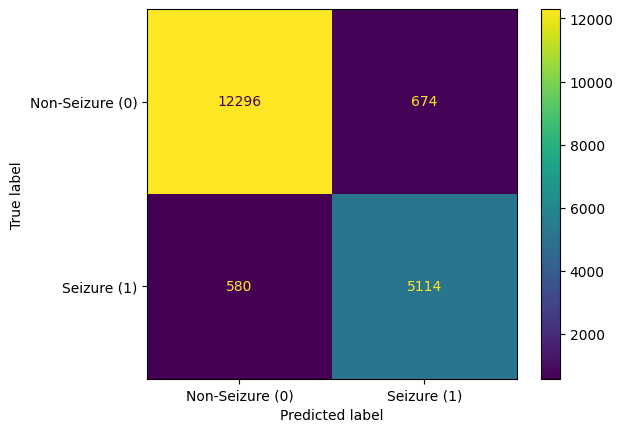

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1. Load the Multi-Band Feature Dataset (Corrected) ---
print("--- Loading pre-computed multi-band feature data ---")
dataset_path = 'TUH_dataset_features_v2.npz' 

data = np.load(dataset_path)
# Load the arrays for the DETECTION task
X = data['X_det']
y = data['y_det']
print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the XGBoost Model ---
print("\n--- Training XGBoost Classifier on Multi-Band Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1000,      
    max_depth=6,            
    learning_rate=0.05,    
    subsample=0.8,   
    colsample_bytree=0.8,   
    gamma=1,              
    min_child_weight=3,     
    reg_alpha=0.01,    
    reg_lambda=1          
)

# Train the model (without early stopping)
model.fit(X_train, y_train)
print("--- Training Complete ---")

# --- 5. Evaluate the Model's Performance ---
print("\n--- Evaluating Model Performance on Test Set ---")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Seizure (0)', 'Seizure (1)']))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
# Use from_predictions to avoid potential version conflicts
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Seizure (0)', 'Seizure (1)'])
disp.plot()
plt.show()

---

# Optimized Threshold

--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 380 features each.

Class Imbalance Ratio (0:1): 2.28 : 1
Data split into 74655 training samples and 18664 test samples.

--- Training XGBoost Classifier on Multi-Band Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Training Complete ---

ROC AUC Score: 0.9816

Best Threshold for F1: 0.4371
Best F1 Score: 0.8980

Classification Report with Optimized Threshold:
                 precision    recall  f1-score   support

Non-Seizure (0)       0.96      0.95      0.95     12970
    Seizure (1)       0.89      0.91      0.90      5694

       accuracy                           0.94     18664
      macro avg       0.92      0.93      0.93     18664
   weighted avg       0.94      0.94      0.94     18664



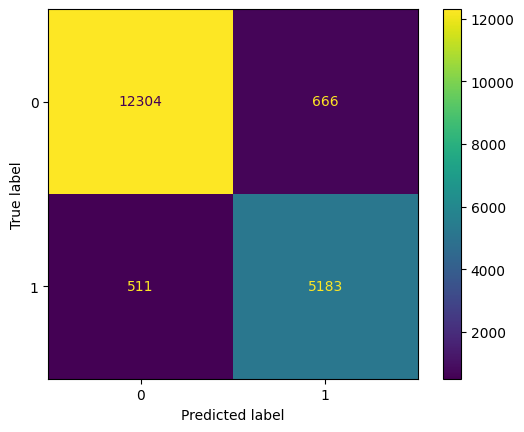

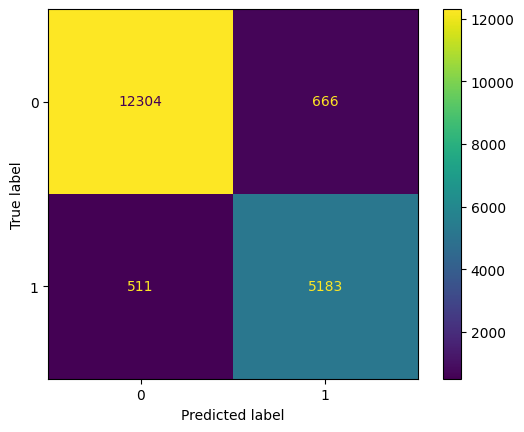

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# --- 1. Load the Multi-Band Feature Dataset ---
print("--- Loading pre-computed multi-band feature data ---")
dataset_path = 'TUH_dataset_features_v2.npz' 

data = np.load(dataset_path)
X = data['X_det']
y = data['y_det']
print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the XGBoost Model ---
print("\n--- Training XGBoost Classifier on Multi-Band Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.1,       
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,         
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("--- Training Complete ---")

# --- 5. Evaluate ROC AUC on Test Set ---
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\nBest Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# --- 7. Predictions using optimized threshold ---
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Non-Seizure (0)', 'Seizure (1)']))

# --- 8. Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt)
disp.plot()
plt.show()






--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 380 features each.

Class Imbalance Ratio (0:1): 2.28 : 1
Data split into 74655 training samples and 18664 test samples.

--- Training XGBoost Classifier on Multi-Band Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Training Complete ---

ROC AUC Score: 0.9816

Best Threshold for F1: 0.4371
Best F1 Score: 0.8980

Classification Report with Optimized Threshold:
                 precision    recall  f1-score   support

Non-Seizure (0)       0.96      0.95      0.95     12970
    Seizure (1)       0.89      0.91      0.90      5694

       accuracy                           0.94     18664
      macro avg       0.92      0.93      0.93     18664
   weighted avg       0.94      0.94      0.94     18664



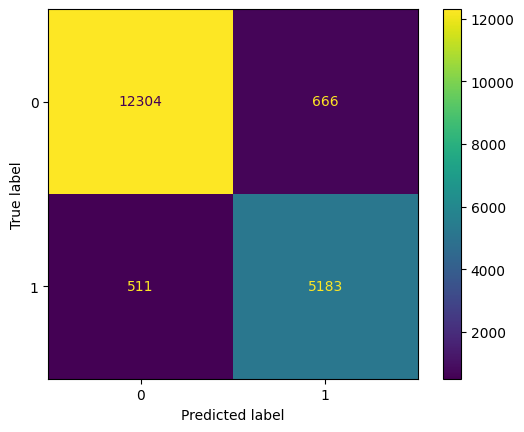

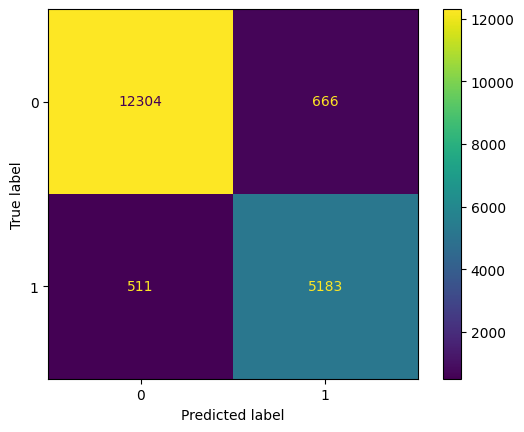

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# --- 1. Load the Multi-Band Feature Dataset ---
print("--- Loading pre-computed multi-band feature data ---")
dataset_path = 'TUH_dataset_features_v2.npz' 

data = np.load(dataset_path)
X = data['X_det']
y = data['y_det']
print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the XGBoost Model ---
print("\n--- Training XGBoost Classifier on Multi-Band Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.1,      
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,    
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("--- Training Complete ---")

# --- 5. Evaluate ROC AUC on Test Set ---
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\nBest Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# --- 7. Predictions using optimized threshold ---
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Non-Seizure (0)', 'Seizure (1)']))

# --- 8. Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt)
disp.plot()
plt.show()






--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 380 features each.

Class Imbalance Ratio (0:1): 2.28 : 1
Data split into 74655 training samples and 18664 test samples.

--- Training XGBoost Classifier on Multi-Band Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Training Complete ---

ROC AUC Score: 0.9816


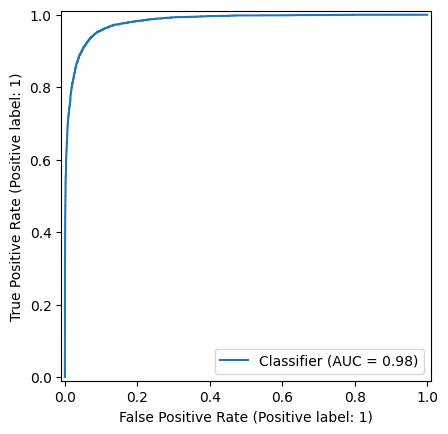


Best Threshold for F1: 0.4371
Best F1 Score: 0.8980

Classification Report with Optimized Threshold:
                 precision    recall  f1-score   support

Non-Seizure (0)       0.96      0.95      0.95     12970
    Seizure (1)       0.89      0.91      0.90      5694

       accuracy                           0.94     18664
      macro avg       0.92      0.93      0.93     18664
   weighted avg       0.94      0.94      0.94     18664



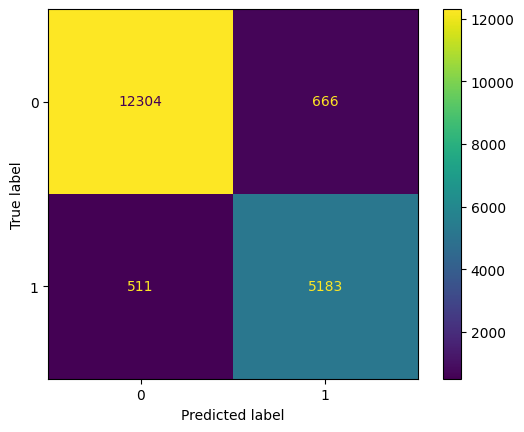

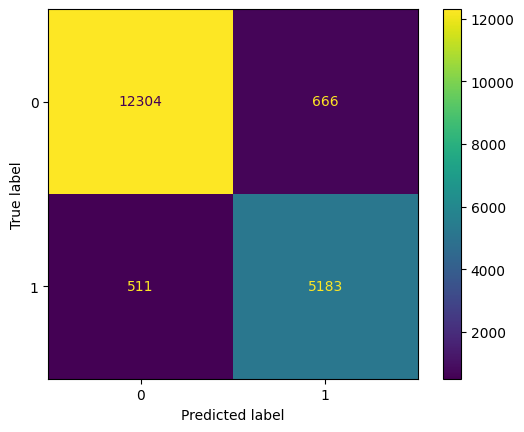

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, f1_score, precision_recall_curve
import matplotlib.pyplot as plt


# --- 1. Load the Multi-Band Feature Dataset ---
print("--- Loading pre-computed multi-band feature data ---")
dataset_path = 'TUH_dataset_features_v2.npz' 

data = np.load(dataset_path)
X = data['X_det']
y = data['y_det']
print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the XGBoost Model ---
print("\n--- Training XGBoost Classifier on Multi-Band Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.1,      
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,          
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("--- Training Complete ---")

# --- 5. Evaluate ROC AUC on Test Set ---
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\nBest Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# --- 7. Predictions using optimized threshold ---
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Non-Seizure (0)', 'Seizure (1)']))

# --- 8. Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt)
disp.plot()
plt.show()







--- ROC Curve Visualization ---


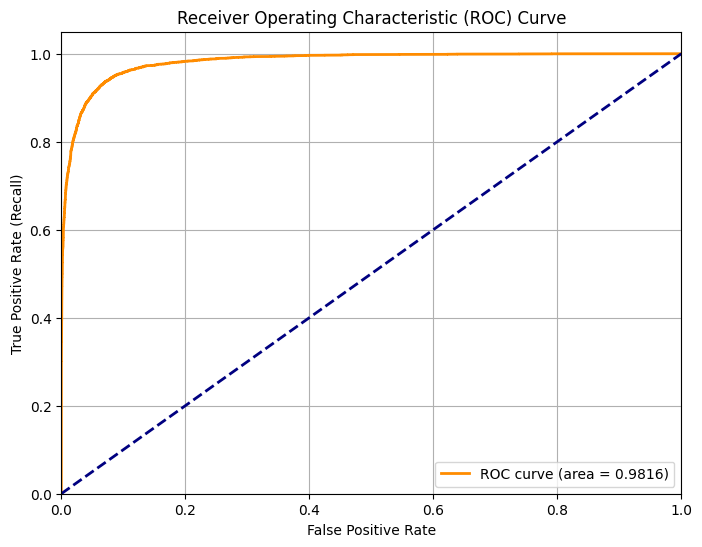

In [4]:
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    f1_score, precision_recall_curve, roc_curve, auc
)

# --- 8. Plot the ROC Curve ---
print("\n--- ROC Curve Visualization ---")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 380 features each.

Calculated Class Imbalance Ratio (0:1): 2.28 : 1
Set up 5-Fold Stratified Cross-Validation.

--- Starting K-Fold Cross-Validation and Training ---

--- Processing Fold 1/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - ROC AUC: 0.9823 | Optimal F1: 0.8996 @ Threshold: 0.4577

--- Processing Fold 2/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - ROC AUC: 0.9820 | Optimal F1: 0.9004 @ Threshold: 0.5081

--- Processing Fold 3/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - ROC AUC: 0.9820 | Optimal F1: 0.9013 @ Threshold: 0.4761

--- Processing Fold 4/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - ROC AUC: 0.9815 | Optimal F1: 0.8958 @ Threshold: 0.5325

--- Processing Fold 5/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - ROC AUC: 0.9814 | Optimal F1: 0.8947 @ Threshold: 0.4814

--- Aggregated K-Fold Performance (Mean ± Std Dev) ---
Overall ROC AUC: 0.9818 ± 0.0003
Overall Optimal F1 Score: 0.8984 ± 0.0026

Classification Report (Last Fold Test Set, Optimized Threshold):
                 precision    recall  f1-score   support

Non-Seizure (0)       0.96      0.95      0.95     12969
    Seizure (1)       0.89      0.90      0.89      5694

       accuracy                           0.94     18663
      macro avg       0.92      0.93      0.92     18663
   weighted avg       0.94      0.94      0.94     18663


--- Generating Plots for the Last Fold ---


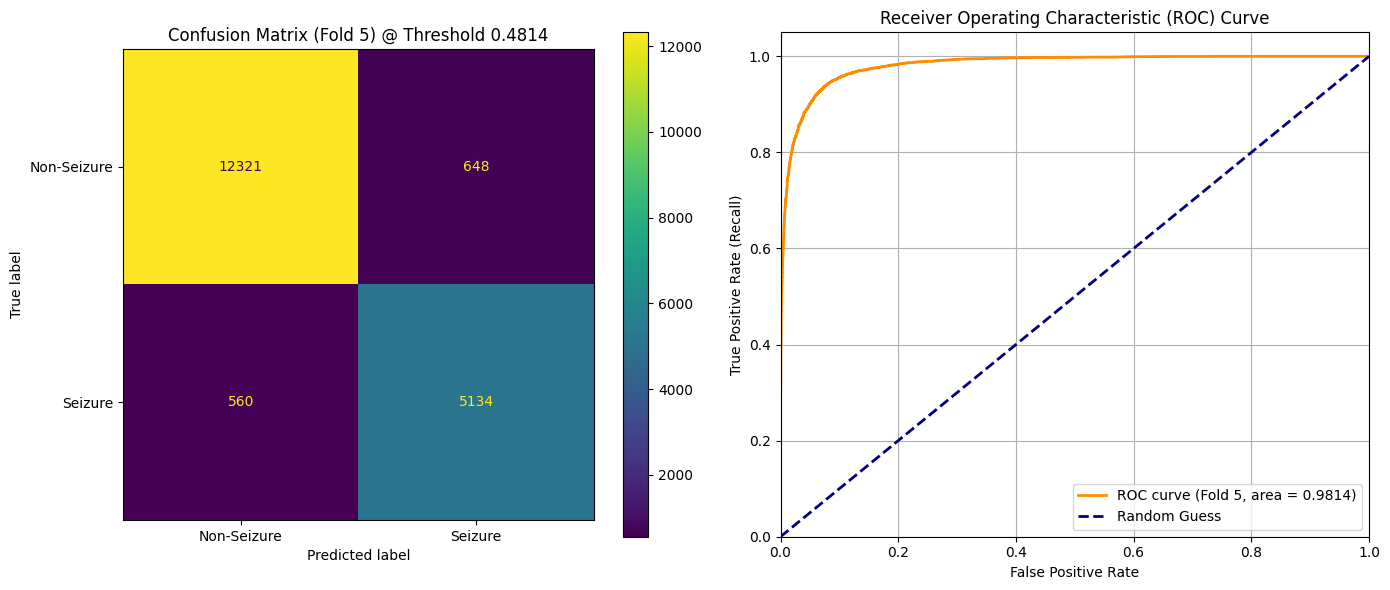

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, f1_score
)
import matplotlib.pyplot as plt

# --- 1. Load the Multi-Band Feature Dataset ---
print("--- Loading pre-computed multi-band feature data ---")
# NOTE: The file 'TUH_dataset_features_v2.npz' must exist in the execution directory
dataset_path = 'TUH_dataset_features_v2.npz' 

try:
    data = np.load(dataset_path)
    X = data['X_det']
    y = data['y_det']
    print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")
except FileNotFoundError:
    print(f"Error: Dataset file '{dataset_path}' not found.")
    print("Please ensure the data file is present to run the analysis.")
    exit()

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nCalculated Class Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Setup Cross-Validation ---
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
print(f"Set up {N_SPLITS}-Fold Stratified Cross-Validation.")

# Initialize lists to store metrics across all folds
roc_auc_list = []
f1_opt_list = []
# Variables to store data from the last fold for plotting
last_y_test, last_y_pred_proba, last_y_pred_opt = None, None, None
last_best_threshold = None

# --- 4. Cross-Validation Loop ---
print("\n--- Starting K-Fold Cross-Validation and Training ---")

# NOTE: The original script used scale_pos_weight=2.1. We will use the calculated
# value for better generalization, but you can change it back to 2.1 if desired.
scale_pos_weight_to_use = scale_pos_weight 

for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\n--- Processing Fold {fold_idx + 1}/{N_SPLITS} ---")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize a fresh model for each fold with your specified hyperparameters
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight_to_use, 
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=1600,
        max_depth=7,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        min_child_weight=4,
        reg_alpha=0.01,
        reg_lambda=1.1
    )

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate performance
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    current_roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_list.append(current_roc_auc)

    # Optimize F1 Score by threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    # Calculate F1 scores (avoiding division by zero)
    f1_scores = np.where((precision + recall) > 0, 2 * (precision * recall) / (precision + recall), 0)
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]
    current_best_f1 = f1_scores[best_idx]
    f1_opt_list.append(current_best_f1)
    
    # Store results from this fold for plotting
    last_y_test = y_test
    last_y_pred_proba = y_pred_proba
    last_best_threshold = best_threshold
    last_y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

    print(f"Fold {fold_idx + 1} - ROC AUC: {current_roc_auc:.4f} | Optimal F1: {current_best_f1:.4f} @ Threshold: {best_threshold:.4f}")

# --- 5. Aggregate and Report Final Metrics ---
print("\n--- Aggregated K-Fold Performance (Mean ± Std Dev) ---")
mean_roc_auc = np.mean(roc_auc_list)
std_roc_auc = np.std(roc_auc_list)
mean_f1 = np.mean(f1_opt_list)
std_f1 = np.std(f1_opt_list)

print(f"Overall ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")
print(f"Overall Optimal F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")

# --- 6. Classification Report for the Last Fold (Representative) ---
print("\nClassification Report (Last Fold Test Set, Optimized Threshold):")
print(classification_report(last_y_test, last_y_pred_opt, target_names=['Non-Seizure (0)', 'Seizure (1)']))


# --- 7. Generate and Display Plots (Using the Last Fold's Results) ---

print("\n--- Generating Plots for the Last Fold ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(last_y_test, last_y_pred_opt, ax=axes[0], 
                                        display_labels=['Non-Seizure', 'Seizure'])
axes[0].set_title(f'Confusion Matrix (Fold {N_SPLITS}) @ Threshold {last_best_threshold:.4f}')

# --- Plot 2: ROC AUC Curve ---
fpr, tpr, _ = roc_curve(last_y_test, last_y_pred_proba)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (Fold {N_SPLITS}, area = {roc_auc_list[-1]:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random Guess')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.tight_layout()
plt.show()


---

## Before using spectral power

--- Loading pre-computed multi-band feature data ---
Loaded 93319 segments with 285 features each.

Class Imbalance Ratio (0:1): 2.07 : 1
Data split into 74655 training samples and 18664 test samples.

--- Training XGBoost Classifier on Multi-Band Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Training Complete ---

ROC AUC Score: 0.9329

Best Threshold for F1: 0.5660
Best F1 Score: 0.7949

Classification Report with Optimized Threshold:
                 precision    recall  f1-score   support

Non-Seizure (0)       0.90      0.91      0.90     12593
    Seizure (1)       0.80      0.79      0.79      6071

       accuracy                           0.87     18664
      macro avg       0.85      0.85      0.85     18664
   weighted avg       0.87      0.87      0.87     18664



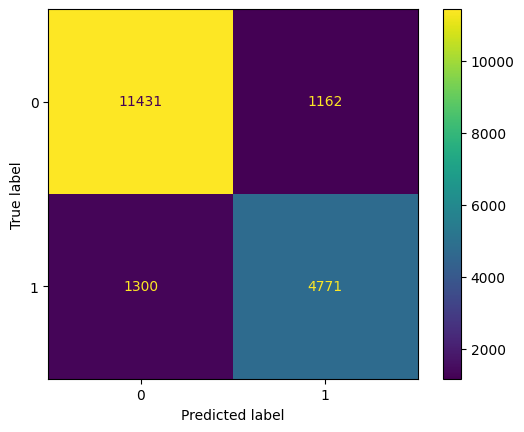

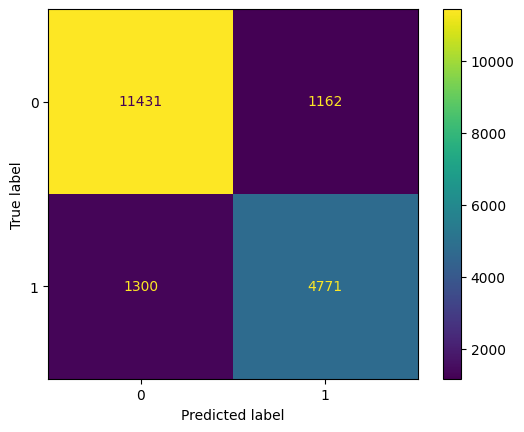


--- ROC Curve Visualization ---


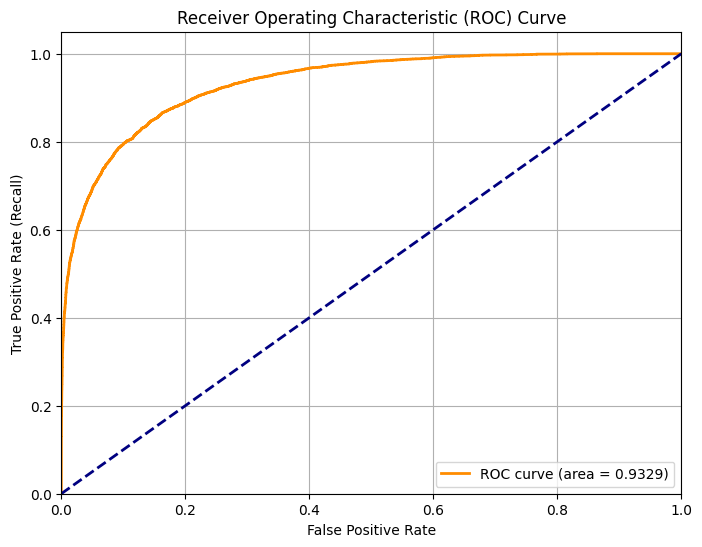

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    f1_score, precision_recall_curve, roc_curve, auc
)
import matplotlib.pyplot as plt

# --- 1. Load the Multi-Band Feature Dataset ---
print("--- Loading pre-computed multi-band feature data ---")
dataset_path = 'TUH_dataset_features.npz' 

data = np.load(dataset_path)
X = data['X']
y = data['y_det']
print(f"Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (0:1): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the XGBoost Model ---
print("\n--- Training XGBoost Classifier on Multi-Band Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.1,       
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,          
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("--- Training Complete ---")

# --- 5. Evaluate ROC AUC on Test Set ---
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\nBest Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# --- 7. Predictions using optimized threshold ---
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Non-Seizure (0)', 'Seizure (1)']))

# --- 8. Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt)
disp.plot()
plt.show()

# --- 9. NEW: Plot the ROC Curve ---
print("\n--- ROC Curve Visualization ---")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

---